# Module 3- Regression & Beta Calculation

   ### Welcome to the Answer notebook for Module 3 ! 
Make sure that you've submitted the module 2 notebook and unlocked Module 3 yourself before you start coding here


### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [144]:
%matplotlib nbagg
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\GOLD.csv')
df.Date = df.Date.astype('datetime64[s]')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null datetime64[ns]
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        411 non-null float64
new         512 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 36.1+ KB


<IPython.core.display.Javascript object>


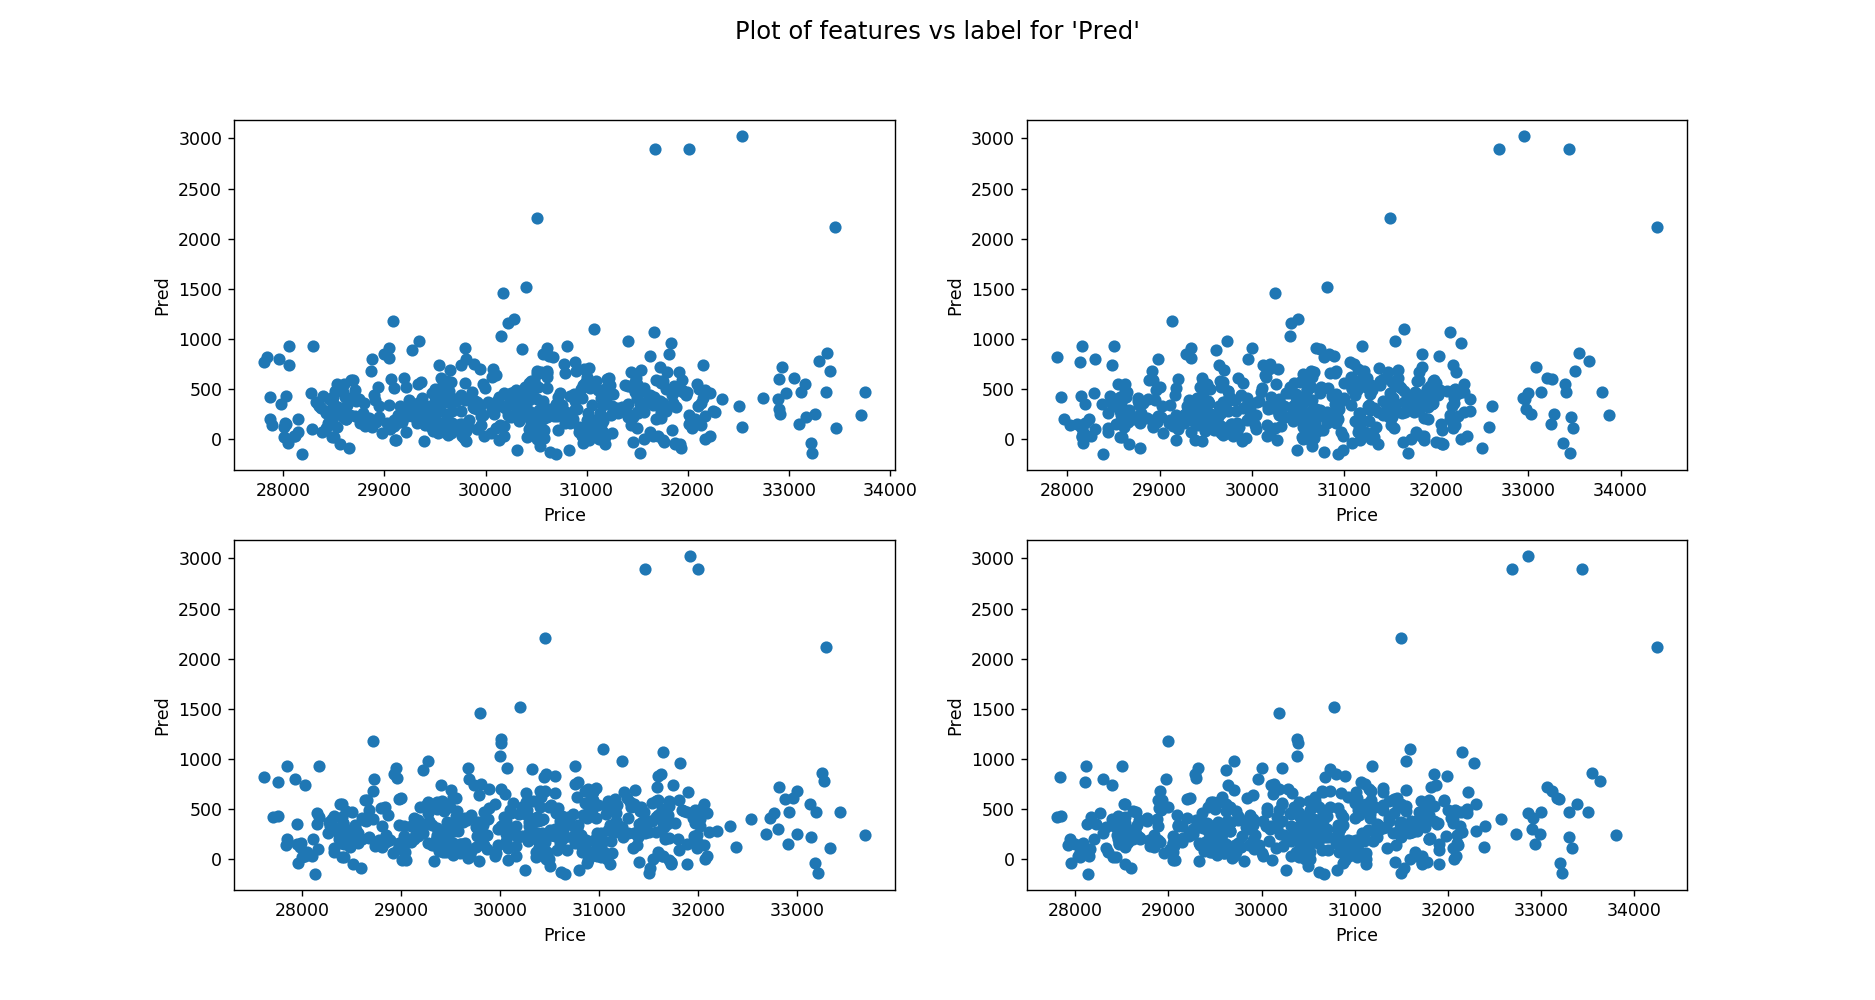

In [47]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(np.array(df['Price']) , np.array(df['Pred']) )
plt.xlabel('Price')
plt.ylabel('Pred')
plt.subplot(2,2,2)
plt.scatter(np.array(df['High']) , np.array(df['Pred']) )
plt.xlabel('Price')
plt.ylabel('Pred')
plt.subplot(2,2,3)
plt.scatter(np.array(df['Low']) , np.array(df['Pred']) )
plt.xlabel('Price')
plt.ylabel('Pred')
plt.subplot(2,2,4)
plt.scatter(np.array(df['Open']) , np.array(df['Pred']) )
plt.xlabel('Price')
plt.ylabel('Pred')
fig = plt.gcf()
txt =fig.suptitle("Plot of features vs label for 'Pred'", fontsize=14)

<IPython.core.display.Javascript object>


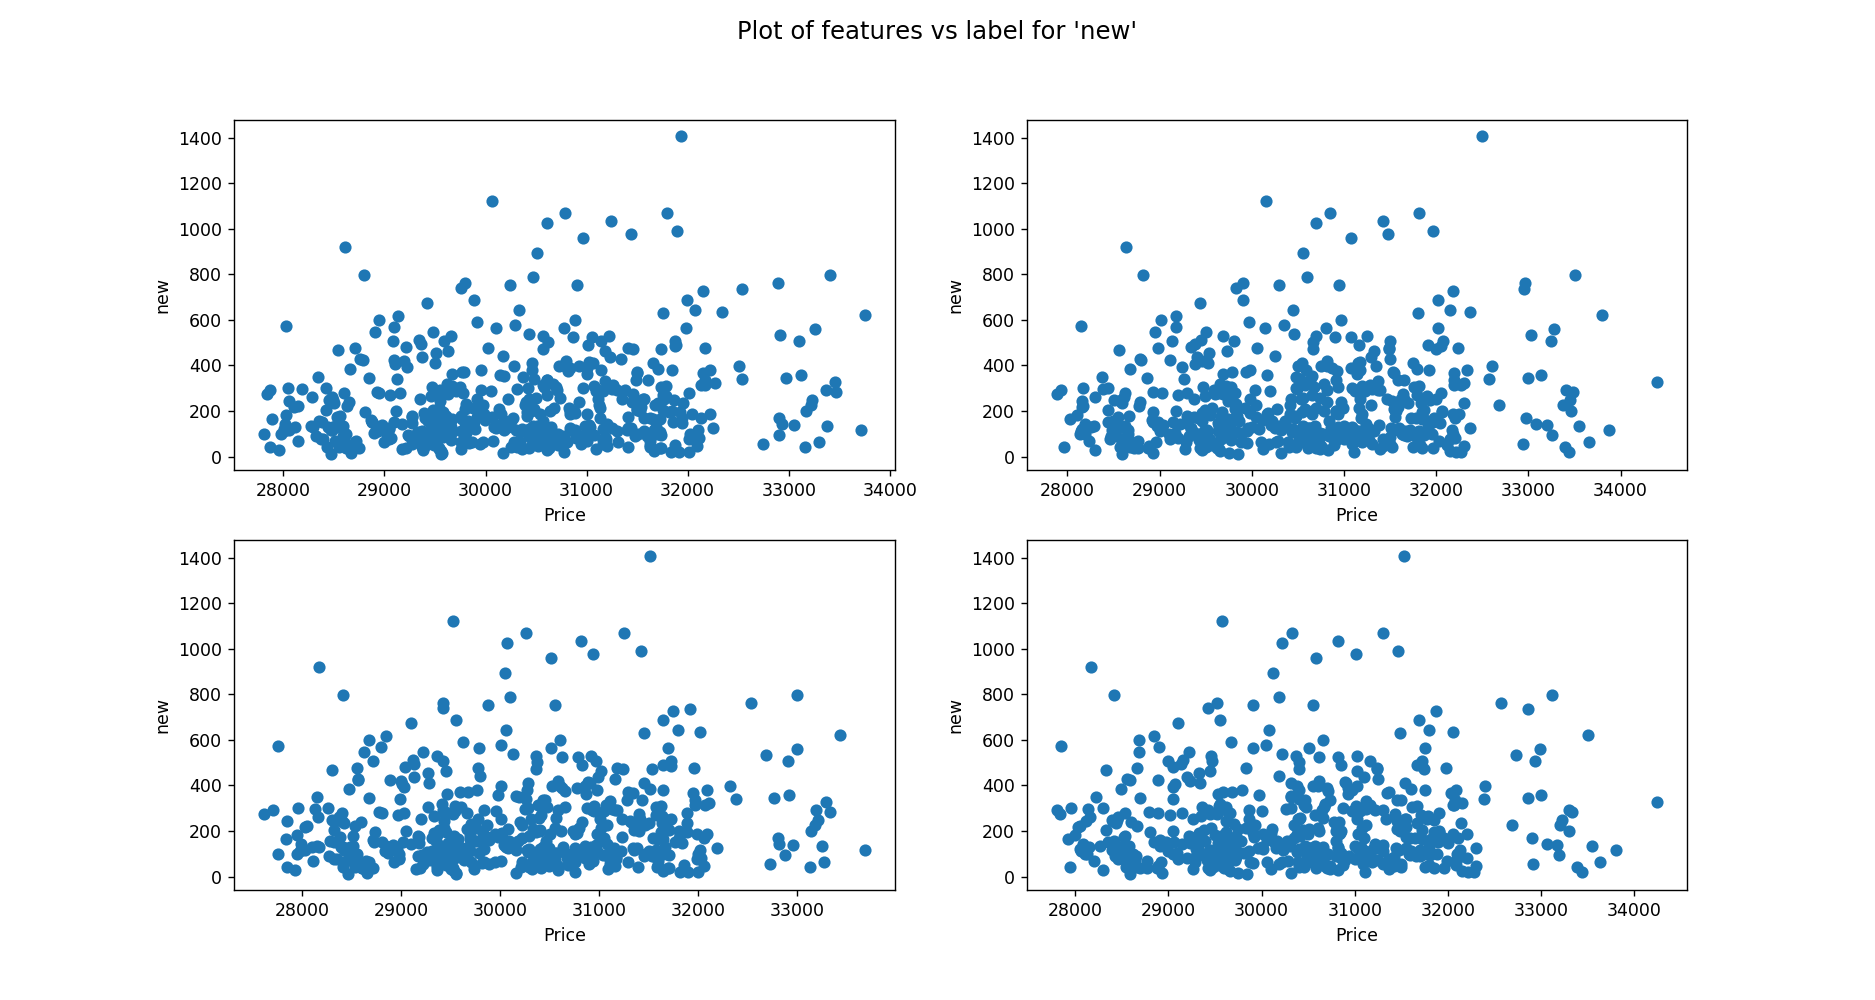

In [48]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(np.array(df['Price']) , np.array(df['new']) )
plt.xlabel('Price')
plt.ylabel('new')
plt.subplot(2,2,2)
plt.scatter(np.array(df['High']) , np.array(df['new']) )
plt.xlabel('Price')
plt.ylabel('new')
plt.subplot(2,2,3)
plt.scatter(np.array(df['Low']) , np.array(df['new']) )
plt.xlabel('Price')
plt.ylabel('new')
plt.subplot(2,2,4)
plt.scatter(np.array(df['Open']) , np.array(df['new']) )
plt.xlabel('Price')
plt.ylabel('new')
fig = plt.gcf()
txt =fig.suptitle("Plot of features vs label for 'new'", fontsize=14)

In [86]:
data_df = df.dropna()
X_train = np.array([data_df['Price'], data_df['High'],data_df['Open'],data_df['Low']]).transpose()
Y_train = np.array(data_df['Pred'])

model = LinearRegression()
model.fit(X_train,Y_train)
# print('The Coefficients are for the linear model are: Price ' + str(model.coef_[0]) + ', High : ' + str(model.coef_[1]) + ', Open : ' + str(model.coef_[2]) + '  and Low : ' + str(model.coef_[3]))
y_true = np.array(data_df['Pred'])
y_pred = model.predict(X_train)
lin_rmse = mean_squared_error(y_true,y_pred)

The Coefficients for the linear model are:
>Price 1.9999715732831438, High : -0.9999884960455991, Open : 3.0000250974305684  and Low : -3.999936348910652

In [59]:
test_df = df[411:]
X_predict = np.array([test_df['Price'], test_df['High'], test_df['Open'], test_df['Low']]).transpose()
predicted_values = np.array(model.predict(X_predict))

for i in range(411, len(df)):
    df.at[i, 'Pred']  = int(np.ceil(predicted_values[i-411]))

In [60]:
polynomial_features = PolynomialFeatures(degree=2)
X_train_ = np.array([df['Price'], df['High'], df['Open'], df['Low']]).transpose()
X_train_poly = polynomial_features.fit_transform(X_train_)

poly_model = LinearRegression()
poly_model.fit(X_train_poly,np.array(df['new']))
y_poly_pred = poly_model.predict(X_train_poly)
y = np.array(df['new'])
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))

The 'New' column corresponds to the Polynomial Model and the 'Pred' column corresponds to the Linear Model

The RMSE Values for the models are:

>'New' : 0.0184 ; 
>'Pred' : 0.030

The Values show the models are very accurate

### Query 3.2
Import the stock of your choosing AND the Nifty index. 
Using linear regression (OLS), calculate -
>The daily Beta value for the past 3 months. (Daily= Daily returns)

>The monthly Beta value. (Monthly= Monthly returns)

Refrain from using the (covariance(x,y)/variance(x)) formula. 
Attempt the question using regression.(Regression Reference) 
Were the Beta values more or less than 1 ? What if it was negative ? 
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [109]:
df_nifty = pd.DataFrame(pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\NIFTY.csv'))
df_nifty.Date = df_nifty.Date.astype('datetime64[ns]')
df_nifty = pd.DataFrame(df_nifty[['Date','Close']])
df_sonata = pd.read_csv(r'week2.csv')
df_sonata.Date = df_sonata.Date.astype('datetime64[ns]')
df_sonata = pd.DataFrame(df_sonata[['Date','Close Price']])
df = df_nifty.merge(df_sonata, left_on= 'Date', right_on = 'Date' )
df_monthly = df
df.columns = ['Date', 'Nifty Close', 'SONATASOFT Close']
df['Nifty Daily Return'] = np.nan
df['SONATASOFT Daily Return'] = np.nan

for i in range(1,len(df)):
    df.at[i , 'Nifty Daily Return'] = df.iloc[i]['Nifty Close']/df.iloc[i-1]['Nifty Close'] - 1
    df.at[i, 'SONATASOFT Daily Return'] = df.iloc[i]['SONATASOFT Close']/df.iloc[i-1]['SONATASOFT Close'] - 1
    
df.dropna(inplace = True)

s = "28/02/2019"
datetime.datetime.strptime(s, "%d/%m/%Y").timestamp()
df = df.where(df['Date'] > s).dropna()

df.head()[['Date' ,'Nifty Daily Return' , 'SONATASOFT Daily Return']].set_index('Date')

,Nifty Daily Return,SONATASOFT Daily Return
Date,,
2019-03-01,0.006579,0.005472
2019-03-05,0.011410,0.000882
2019-03-06,0.005966,-0.011315
2019-03-07,0.000470,0.007580
2019-03-08,-0.002062,-0.023307


In [106]:
X_train = np.array(df['Nifty Daily Return']).reshape(-1,1)
Y_train = np.array(df['SONATASOFT Daily Return'])
_model = LinearRegression()
_model.fit(X_train,Y_train)
_model.coef_

array([-0.08485518])

From the Linear Regression trained using the Daily Returns for Nifty and stocks of the company SONATA SOFTWARE, we find that
> Beta Value : -0.0848

From the given data, we infer that the beta value of the chosen stock is negative. A negative beta correlation means an investment moves in the opposite direction from the stock market. When the market rises, a negative-beta investment generally falls. When the market falls, the negative-beta investment will tend to rise.

In [142]:
df_nifty = pd.DataFrame(pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\NIFTY.csv'))
df_nifty.Date = df_nifty.Date.astype('datetime64[ns]')
df_nifty = pd.DataFrame(df_nifty[['Date','Close']])
df_sonata = pd.read_csv(r'week2.csv')
df_sonata.Date = df_sonata.Date.astype('datetime64[ns]')
df_sonata = pd.DataFrame(df_sonata[['Date','Close Price']])
df = df_nifty.merge(df_sonata, left_on= 'Date', right_on = 'Date' )
df.set_index('Date',inplace = True)
df = df.resample('m').mean()
df.columns = ['Nifty Close', 'SONATASOFT Close']

df['Nifty Monthly Return'] = np.nan
df['SONATASOFT Monthly Return'] = np.nan

df.reset_index(inplace = True)

for i in range(1,len(df)):
    df.at[i , 'Nifty Monthly Return'] = df.iloc[i]['Nifty Close']/df.iloc[i-1]['Nifty Close'] - 1
    df.at[i, 'SONATASOFT Monthly Return'] = df.iloc[i]['SONATASOFT Close']/df.iloc[i-1]['SONATASOFT Close'] - 1
    
df.dropna(inplace = True)  

df[['Date', 'Nifty Monthly Return', 'SONATASOFT Monthly Return']].head()

,Date,Nifty Monthly Return,SONATASOFT Monthly Return
1,2017-06-30,0.011412,0.022112
2,2017-07-31,0.025311,0.045226
3,2017-08-31,0.005184,-0.029457
4,2017-09-30,0.007750,-0.027725
5,2017-10-31,0.016112,0.045550


In [143]:
X_train = np.array(df['Nifty Monthly Return']).reshape(-1,1)
Y_train = np.array(df['SONATASOFT Monthly Return'])
_model = LinearRegression()
_model.fit(X_train,Y_train)
_model.coef_

array([1.3722037])

From the Linear Regression trained using the Monthly Returns for Nifty and stocks of the company SONATA SOFTWARE, we find that
> Beta Value : 1.372

The stock's monthly beta value is 1.3, it means that this stock is 30% more volatile than the market we can also assume that the negative value obtained for daily returns can be to high noise.